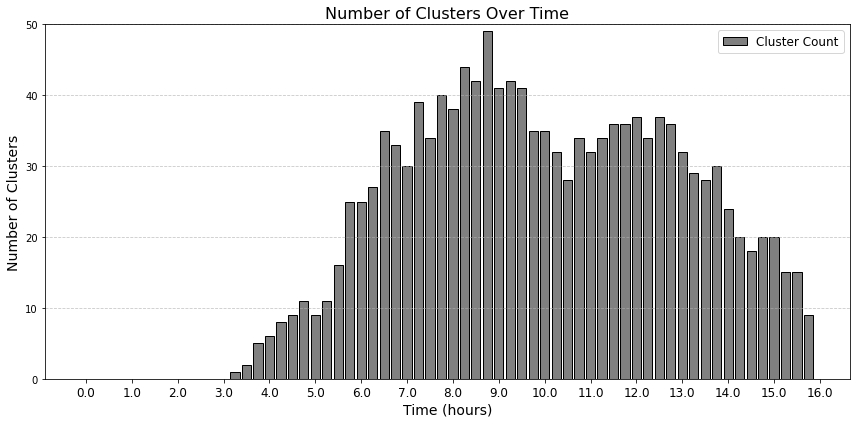

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# File paths for the replicates
file_paths = [
    'Results9.csv',  
    'Results10.csv',
    'Results19.csv',
    'Results20.csv'
]

# Load and process each replicate
data_frames = []
for idx, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    df['Replicate'] = f'Replicate {idx + 1}'
    data_frames.append(df)

# Combine data for all replicates
combined_data = pd.concat(data_frames, ignore_index=True)

# Group data by timepoint (Slice) and sum across replicates
grouped = combined_data.groupby(['Slice']).size()

# Ensure all time points are represented (fill missing slices with zeros)
full_timepoints = np.arange(0, 64)  # Assuming 64 total timepoints
grouped = grouped.reindex(full_timepoints, fill_value=0)

# Convert Slice (timepoints) to hours
timepoints = grouped.index.to_numpy() * 15 / 60  # Convert slices to hours
cluster_counts = grouped.values.astype(float)  # Ensure numeric type

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(timepoints, cluster_counts, color='gray', edgecolor='black', width=0.2, label='Cluster Count')

# Customize the plot
ax.set_title('Number of Clusters Over Time', fontsize=16)
ax.set_xlabel('Time (hours)', fontsize=14)
ax.set_ylabel('Number of Clusters', fontsize=14)
ax.set_ylim(0, 50)

# Set x-axis ticks to display time only every hour
hourly_ticks = np.arange(0, max(timepoints) + 1, 1)
ax.set_xticks(hourly_ticks)
ax.set_xticklabels([f"{hour}" for hour in hourly_ticks], fontsize=12)

ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
#plt.savefig('cluster better plot.svg', format='svg') #Save the figure
plt.show()